<a href="https://colab.research.google.com/github/AITeamAdmin/TlvLLM_Search/blob/main/%D7%AA%D7%A8%D7%A9%D7%99%D7%9E%D7%99%D7%9D_%D7%9C%D7%9E%D7%A1%D7%9E%D7%9A_%D7%AA%D7%99%D7%A2%D7%95%D7%93_%D7%9B%D7%9C%D7%9C%D7%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **טעינת** **מידע**

In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import nltk
import random
from nltk import word_tokenize
nltk.download('punkt')
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Define the model. Either from scratch of by loading a pre-trained model
model = SentenceTransformer('intfloat/multilingual-e5-large')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [ ]:
basketball_facts = [
   "כדורסל הומצא בשנת 1891 על ידי נייסמית גיימס"
  "משחק הכדורסל משחקים 5 שחקנים מול 5 שחקנים",
  "הכדורסל משחקים עם כדור כתום גדול ומרשים",
  "יש לקלוע את הכדור לסל הנמצא מעל הטבעת",
  "שחקנים גבוהים הם בעלי יתרון בכדורסל",
  "מייקל ג'ורדן נחשב לשחקן הכדורסל הטוב ביותר",
  "נבחרת ה-NBA של ארצות הברית היא החזקה בעולם" ,
  "משחקי כדורסל מחולקים לרבעים של עשר דקות",
  "ליגת ה-NBA היא ליגת הכדורסל הטובה בעולם",
  "סל של שלוש נקודות שווה יותר מסל רגיל",
  "הקבוצה עם הניקוד הגבוה יותר מנצחת",
  "יש 24 שניות לבצע זריקה בכל התקפה",
  "דריבל משמעו לגלגל את הכדור תוך כדי ריצה",
  "חסימה היא חסימת שחקן מהקבוצה היריבה",
  "ריבאונד הוא כדור חוזר אחרי זריקה ללוח",
  "סטפן קרי הוא שיאן הקליעה לשלשות ב-NBA",
  "בכדורסל אסור לרוץ עם הכדור ביד",
  "יש 5 עבירות לשחקן בטרם הוא מורחק",
  "מגישי הכדור הם חשובים בהעברת הכדור",
  "הרבה ילדים משחקים כדורסל להנאתם"
]




embeddings_basketball = model.encode(basketball_facts)

In [ ]:
sentences_good_basketball = [
  "כדורסל הוא משחק קבוצתי מהנה מאוד",
  "כדורסל דורש שיתוף פעולה בין השחקנים",
  "בכדורסל יש תנועה מתמדת במגרש",
  "זריקות לסל מכדורסל הן מלהיבות",
  "חוקי המשחק בכדורסל פשוטים להבנה",
  "כדורסל מפתח את הכושר הגופני",
  "משחק הכדורסל דינמי מאוד",
  "האווירה במשחק כדורסל סוערת",
  "כדורסל דורש קליעה מדוייקת לסל",
  "שחקני כדורסל טובים הם אתלטים",
  "כדורסל משלב מיומנות ועבודת צוות",
  "המתח במשחק כדורסל גבוה",
  "משחק הכדורסל מהיר מאוד",
  "לכדורסל יש הרבה אוהדים נלהבים",
  "כדורסל הוא ספורט אהוב בישראל",
  "משחק כדורסל מותח ומרתק",
  "בכדורסל יש הרבה תנועה של כדור",
  "במגרש כדורסל יש הרבה מתח",
  "כדורסל מאפשר יכולות גופניות",
  "שחקני כדורסל טובים הם כישרוניים"
]

embeddings_good_basketball = model.encode(sentences_good_basketball)

In [ ]:
sentences_bad_basketball = [
  "כדורסל הוא משחק משעמם למדי",
  "חוקי המשחק בכדורסל מבלבלים",
  "כדורסל דורש מאמץ גופני רב",
  "האווירה במגרש כדורסל רעשנית",
  "קליעה לסל בכדורסל קשה מאוד",
  "שחקני כדורסל פוגעים זה בזה",
  "משחק הכדורסל אגרסיבי מדי",
  "יש הרבה פציעות בכדורסל",
  "אימוני כדורסל קשים ותובעניים",
  "משחקי כדורסל ארוכים מדי",
  "כדורסל דורש כישרון גבוה",
  "בכדורסל יש יותר מדי עבירות",
  "שופטי כדורסל לא הוגנים",
  "אוהדי כדורסל אלימים לעיתים",
  "מחיר כרטיס למשחק יקר",
  "הרבה פצועים בכדורסל",
  "שחקנים מרמים בכדורסל",
  "יש שימוש בסמים בכדורסל",
  "משחק כדורסל בלתי הוגן",
  "חוקי כדורסל מורכבים מדי"
]

embeddings_bed_basketball = model.encode(sentences_bad_basketball)

In [ ]:
democracy_facts = [
  "הדמוקרטיה נולדה ביוון העתיקה",
  "דמוקרטיה משמעותה שלטון העם",
  "בחירות דמוקרטיות מתקיימות מדי מספר שנים",
  "כל אזרח בוגר יכול להצביע בבחירות",
  "חופש הביטוי הוא זכות יסוד דמוקרטית",
  "דמוקרטיה מגנה על זכויות אדם ואזרח",
  "שוויון בפני החוק הוא עיקרון דמוקרטי",
  "רוב קובע בהצבעות דמוקרטיות",
  "יש הפרדת רשויות בדמוקרטיה",
  "בתי משפט עצמאיים הם חיוניים לדמוקרטיה",
  "העיתונות חופשית בדמוקרטיה",
  "יש לקיים ביקורת על בעלי עמדות כח בדמוקרטיה",
  "מפלגות שונות מתמודדות על השלטון בבחירות דמוקרטיות",
  "אפשר למחות נגד הממשל בצורה דמוקרטית",
  "אסורה אפליה על רקע דת גזע ומגדר בדמוקרטיה",
  "חוקה קובעת כללים דמוקרטים בסיסיים",
  "בדמוקרטיה המיעוט חייב לקבל החלטות הרוב",
  "פשרות הן חלק מהמשחק הדמוקרטי",
  "אין עריצות שלטון במשטר דמוקרטי"
]

democracy_embeddings = model.encode(democracy_facts)

In [ ]:
sentences_good_democracy = [
  "דמוקרטיה מאפשרת חופש בחירה לאזרחים ",
  "בחירות דמוקרטיות מעניקות שוויון פוליטי",
  "חופש הביטוי מאפשר ביקורת על השלטון",
  "משטר דמוקרטי מגן על זכויות הפרט",
  "דמוקרטיה יציבה תלויה באזרחים אחראיים",
  "הפרדת רשויות מונעת ריכוז כח מוחלט",
  "דמוקרטיה מאפשרת מגוון דעות ומפלגות",
  "בתי משפט עצמאיים הם מרכיב קריטי",
  "עיתונות חופשית חיונית לדמוקרטיה בריאה",
  "שלטון החוק והגנה על זכויות מיעוטים חשובים",
  "דמוקרטיה צריכה אזרחים מודעים ומעורבים",
  "מדינה דמוקרטית שואפת לרווחת כל האזרחים",
  "בחירות הוגנות הן ערובה לייצוג הולם",
  "חברה אזרחית חזקה תומכת בערכים דמוקרטיים",
  "פלורליזם וסובלנות הם נכס דמוקרטי",
  "קבלת החלטות מתוך דיון ופשרה הם דרך דמוקרטית",
  "תקשורת חופשית היא נכס דמוקרטי חשוב",
  "הפגנות ומחאה הן זכות דמוקרטית בסיסית",
  "בחירה של מנהיגים בהליך דמוקרטי היא זכות יסוד",
  "שמירה על זכויות המיעוט היא ערך דמוקרטי עליון"
]

embeddings_good_democracy = model.encode(sentences_good_democracy)

In [ ]:
sentences_bad_democracy = [
  "תהליכים דמוקרטיים לעיתים איטיים מדי",
  "קבלת החלטות בדמוקרטיה יכולה לקחת זמן רב",
  "לפעמים פוליטיקאים מנצלים את הדמוקרטיה לרעה",
  "דמוקרטיה יכולה לאפשר עליית משטרים אנטי דמוקרטיים",
  "בחירת הרע ברע בבחירות דמוקרטיות",
  "דמוקרטיה מאפשרת חופש ביטוי גם לדעות מסוכנות",
  "לפעמים רוב טועה בהחלטות דמוקרטיות",
  "דמוגרפיה מאתגרת דמוקרטיות מסורתיות",
  "אי שוויון כלכלי מערער את הדמוקרטיה",
  "שחיתות פוליטית פוגעת בלגיטימיות הדמוקרטית",
  "יש איומים על עצמאות הרשות השופטת",
  "המון חסר דעת מאיים על יציבות המשטר",
  "יש בעיית ייצוג עמוקה של מיעוטים",
  "תעמולה ופייק ניוז מטעים את הבוחר",
  "אינטרסים כלכליים מעוותים תהליכים דמוקרטיים",
  "לעיתים יש הסתה נגד מיעוטים בחברה דמוקרטית",
  "פערים חברתיים פוגעים באמון האזרח בדמוקרטיה",
  "השפעת הון זרה עלולה לפגוע בריבונות מקומית",
  "פופוליזם הורס ערכים דמוקרטיים"
]

embeddings_bed_democracy = model.encode(sentences_bad_democracy)

### **תרשים** **מרחק** **וקטורי**

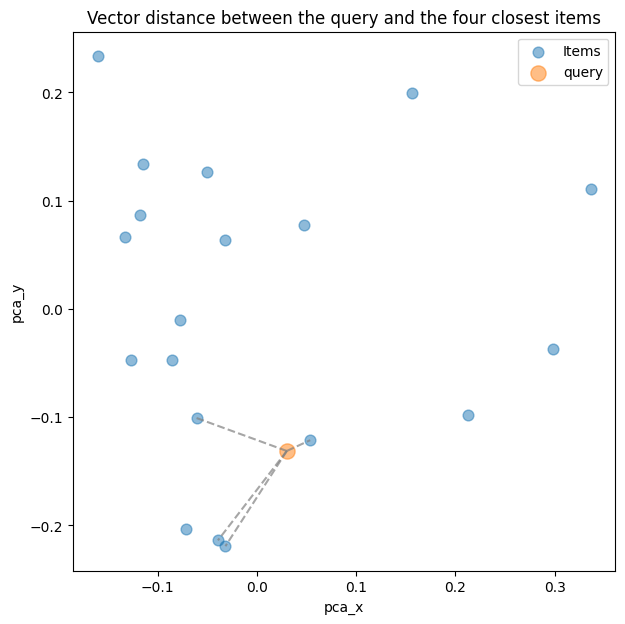

In [ ]:
# יצירת מודל PCA והתאמתו לנתונים
pca = PCA(n_components=2)
pca.fit(embeddings_basketball)
embeddings_query = model.encode(['כדורסל זה ענף ספורט נפוץ'])

# המרת הווקטורים ל-2 ממדים ע"י ה-PCA
reduced_vectors_facts_basketball = pca.transform(embeddings_basketball)
reduced_vectors_query = pca.transform(embeddings_query)



# יצירת גרף 2D
x_facts_basketbull = [v[0] for v in reduced_vectors_facts_basketball]
y_facts_basketbull = [v[1] for v in reduced_vectors_facts_basketball]

x_query = [v[0] for v in reduced_vectors_query]
y_query = [v[1] for v in reduced_vectors_query]


# Calculate distances between the query and "basketball" topic points
distances = np.sqrt(np.sum((np.array(reduced_vectors_facts_basketball) - np.array(reduced_vectors_query)) ** 2, axis=1))

# Sort the distances and get the indices of the four closest points
closest_indices = np.argsort(distances)[:4]


# ויזואליזציה
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(x_facts_basketbull, y_facts_basketbull, label="Items", alpha=0.5,s=60)
ax.scatter(x_query, y_query, label="query", alpha=0.5,s=120)

# Draw lines between the query and the four closest "basketball" topic points
for i in closest_indices:
    ax.plot([x_query[0], x_facts_basketbull[i]], [y_query[0], y_facts_basketbull[i]], linestyle='--', color='gray', alpha=0.7)


ax.set_xlabel("pca_x")
ax.set_ylabel("pca_y")
ax.legend()
ax.set_title("Vector distance between the query and the four closest items")
plt.show()

### **תרשים** **קטגויאלית**

In [ ]:
list_embeddings = np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy])

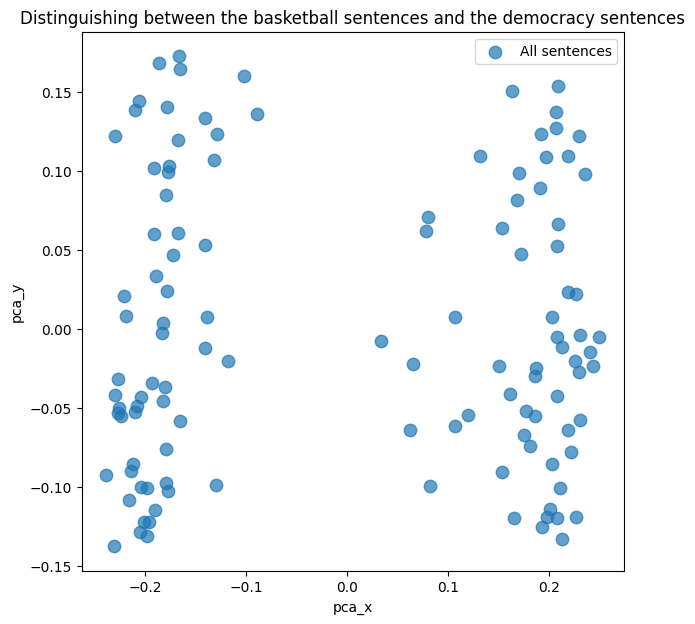

In [ ]:
# יצירת מודל PCA והתאמתו לנתונים
pca = PCA(n_components=2)
pca.fit(list_embeddings)

# המרת הווקטורים ל-2 ממדים ע"י ה-PCA
reduced_vectors = pca.transform(list_embeddings)



# יצירת גרף 2D
x = [v[0] for v in reduced_vectors]
y = [v[1] for v in reduced_vectors]


# ויזואליזציה
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(x, y, label="All sentences", alpha=0.7,s=80)
ax.set_xlabel("pca_x")
ax.set_ylabel("pca_y")
ax.legend()
ax.set_title("Distinguishing between the basketball sentences and the democracy sentences")
plt.show()

### **תרשים** **הבחנה** **סמנטית**

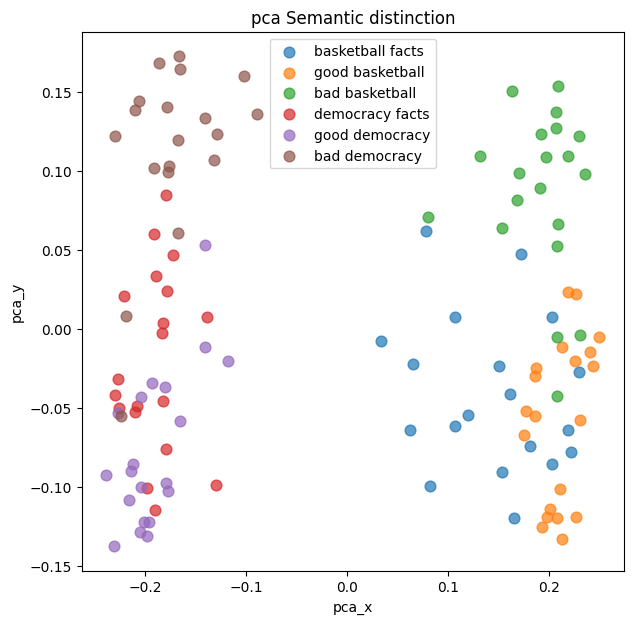

In [ ]:
# יצירת מודל PCA והתאמתו לנתונים
pca = PCA(n_components=2)
pca.fit(list_embeddings)

# המרת הווקטורים ל-2 ממדים ע"י ה-PCA
reduced_vectors_facts_basketbull = pca.transform(embeddings_basketball)
reduced_vectors_facts_good_basketbull = pca.transform(embeddings_good_basketball)
reduced_vectors_facts_bed_basketbull = pca.transform(embeddings_bed_basketball)
reduced_vectors_facts_democracy = pca.transform(democracy_embeddings)
reduced_vectors_facts_good_democracy = pca.transform(embeddings_good_democracy)
reduced_vectors_facts_bed_democracy = pca.transform(embeddings_bed_democracy)




# יצירת גרף 2D
x_facts_basketbull = [v[0] for v in reduced_vectors_facts_basketbull]
y_facts_basketbull = [v[1] for v in reduced_vectors_facts_basketbull]

x_facts_good_basketbull = [v[0] for v in reduced_vectors_facts_good_basketbull]
y_facts_good_basketbull = [v[1] for v in reduced_vectors_facts_good_basketbull]

x_facts_bed_basketbull = [v[0] for v in reduced_vectors_facts_bed_basketbull]
y_facts_bed_basketbull = [v[1] for v in reduced_vectors_facts_bed_basketbull]

x_facts_democracy = [v[0] for v in reduced_vectors_facts_democracy]
y_facts_democracy = [v[1] for v in reduced_vectors_facts_democracy]

x_facts_good_democracy = [v[0] for v in reduced_vectors_facts_good_democracy]
y_facts_good_democracy = [v[1] for v in reduced_vectors_facts_good_democracy]

x_facts_bed_democracy = [v[0] for v in reduced_vectors_facts_bed_democracy]
y_facts_bed_democracy = [v[1] for v in reduced_vectors_facts_bed_democracy]


# ויזואליזציה
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(x_facts_basketbull, y_facts_basketbull, label="basketball facts", alpha=0.7,s=60)
ax.scatter(x_facts_good_basketbull, y_facts_good_basketbull, label="good basketball", alpha=0.7,s=60)
ax.scatter(x_facts_bed_basketbull, y_facts_bed_basketbull, label="bad basketball", alpha=0.7,s=60)
ax.scatter(x_facts_democracy, y_facts_democracy, label="democracy facts", alpha=0.7,s=60)
ax.scatter(x_facts_good_democracy, y_facts_good_democracy, label="good democracy", alpha=0.7,s=60)
ax.scatter(x_facts_bed_democracy, y_facts_bed_democracy, label="bad democracy", alpha=0.7,s=60)
ax.set_xlabel("pca_x")
ax.set_ylabel("pca_y")
ax.legend()
ax.set_title("pca Semantic distinction")
plt.show()


### **בדיקת** **ג'יבריש**

In [ ]:
list_sentences = basketball_facts + sentences_good_basketball + sentences_bad_basketball + democracy_facts + sentences_good_democracy + sentences_bad_democracy

In [ ]:
#פונקציה למציאת סטטיסטיקות על משפטים

def text_analysis(s):
    words = []
    for sentence in s:
        words.extend(nltk.word_tokenize(sentence))

    # Frequency of letters
    alphabet_freq = nltk.FreqDist(char for char in "".join(s) if char.isalpha())

    # Count of unique words
    unique_words = set(words)
    num_unique_words = len(unique_words)

    # Average sentence length in words
    avg_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in s) / len(s)

    # Average word length in characters
    words = nltk.word_tokenize("".join(s))
    word_lengths = [len(word) for word in "".join(s)]
    avg_word_length = sum(word_lengths) / len(words)

    print(alphabet_freq)
    print(f'Number of unique words: {num_unique_words}')
    print(f'Average sentence length in words: {avg_sentence_length}')
    print(f'Average word length in characters: {avg_word_length}')

    return num_unique_words, avg_sentence_length, avg_word_length

In [ ]:
def generate_gibberish_sentences(s, amount_sentences, avg_sentence_length_words, avg_word_length):
    # Calculate frequency of letters using original text
    alphabet_freq = nltk.FreqDist(char for char in "".join(s) if char.isalpha())

    gibberish_sentences = []
    for _ in range(amount_sentences):
        sentence_length = round(random.uniform(avg_sentence_length_words - 1, avg_sentence_length_words + 1))
        sentence = ""

        for _ in range(sentence_length):
            word_length = round(random.uniform(avg_word_length - 1, avg_word_length + 1))
            word = ""

            # Generate a word with the correct letter frequencies
            for _ in range(word_length):
                letter = random.choices(list(alphabet_freq.keys()), weights=list(alphabet_freq.values()))[0]
                word += letter

            sentence += word + " "

        gibberish_sentences.append(sentence.strip())

    return gibberish_sentences

In [ ]:
num_unique_words, avg_sentence_length, avg_word_length = text_analysis(list_sentences)

<FreqDist with 30 samples and 3281 outcomes>
Number of unique words: 404
Average sentence length in words: 5.589743589743589
Average word length in characters: 7.109461966604823


In [ ]:
gibberish_sentences = generate_gibberish_sentences(list_sentences,len(list_sentences),avg_sentence_length,avg_word_length)
embeddings_gibberish = model.encode(gibberish_sentences)

In [ ]:
text_analysis(gibberish_sentences)

<FreqDist with 30 samples and 4656 outcomes>
Number of unique words: 657
Average sentence length in words: 5.615384615384615
Average word length in characters: 9.604436229205175


(657, 5.615384615384615, 9.604436229205175)

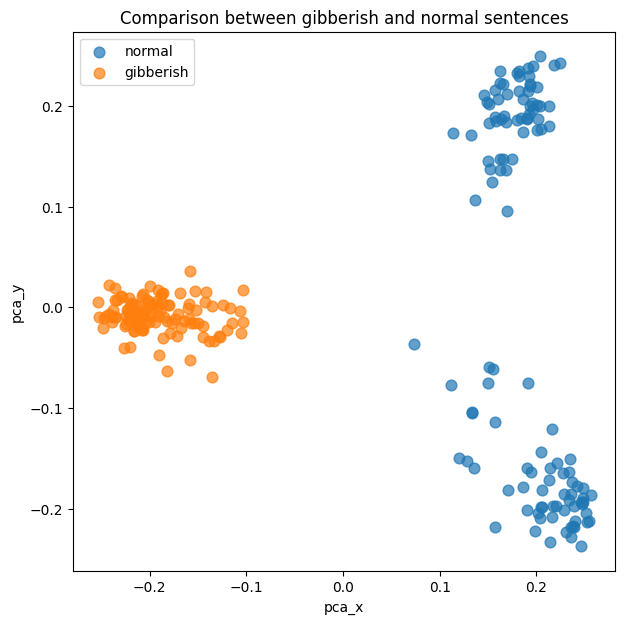

In [ ]:
# יצירת מודל PCA והתאמתו לנתונים
pca = PCA(n_components=2)
pca.fit(np.concatenate([embeddings_gibberish,embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy]))

# המרת הווקטורים ל-2 ממדים ע"י ה-PCA
reduced_vectors_facts = pca.transform(np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy]))
reduced_vectors_gibberish = pca.transform(embeddings_gibberish)



# יצירת גרף 2D
x_facts = [v[0] for v in reduced_vectors_facts]
y_facts = [v[1] for v in reduced_vectors_facts]

x_gibberish = [v[0] for v in reduced_vectors_gibberish]
y_gibberish = [v[1] for v in reduced_vectors_gibberish]



# ויזואליזציה
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(x_facts, y_facts, label="normal", alpha=0.7,s=60)
ax.scatter(x_gibberish, y_gibberish, label="gibberish", alpha=0.7,s=60)

ax.set_xlabel("pca_x")
ax.set_ylabel("pca_y")
ax.legend()
ax.set_title("Comparison between gibberish and normal sentences")
plt.show()

### **בדיקה** **עם** **TESNI**

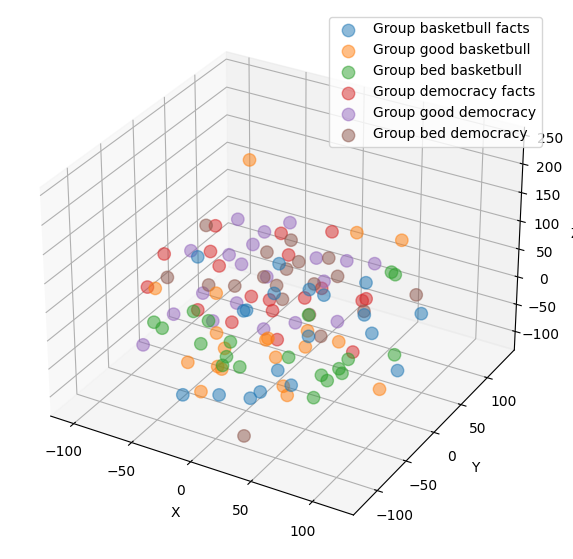

In [ ]:
# נתונים רב-ממדיים מ-6 קבוצות בגדלים שונים
X = np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy])
y = np.concatenate((np.zeros(embeddings_basketball.shape[0]), np.ones(embeddings_good_basketball.shape[0]), 2*np.ones(embeddings_bed_basketball.shape[0]),
                    3*np.ones(democracy_embeddings.shape[0]), 4*np.ones(embeddings_good_democracy.shape[0]), 5*np.ones(embeddings_bed_democracy.shape[0])))

# יוצרים מקרן T-SNE ומריצים על כל הנתונים
tsne = TSNE(n_components=3)
X_3d = tsne.fit_transform(X)

# מציגים בתרשים 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')


#colors = ['r', 'g', 'b', 'y', 'm', 'c']
#sizes = [60, 50, 40, 30, 70, 20]  # גדלי הנקודות עבור כל קבוצה
labels = ["basketbull facts","good basketbull","bed basketbull","democracy facts","good democracy","bed democracy"]
for i in range(6):
    ax.scatter(X_3d[y==i,0], X_3d[y==i,1], X_3d[y==i,2], label=f'Group {labels[i]}', alpha=0.5,s=80)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

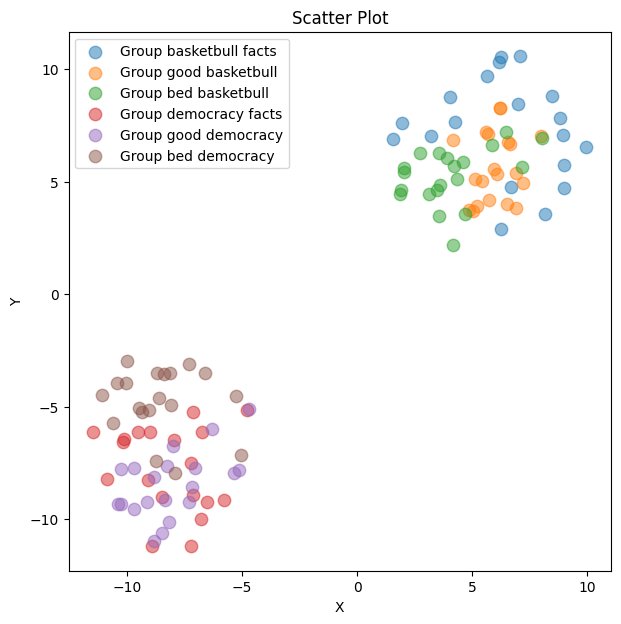

In [ ]:
# נתונים רב-ממדיים מ-6 קבוצות בגדלים שונים
X = np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy])
y = np.concatenate((np.zeros(embeddings_basketball.shape[0]), np.ones(embeddings_good_basketball.shape[0]), 2*np.ones(embeddings_bed_basketball.shape[0]),
                    3*np.ones(democracy_embeddings.shape[0]), 4*np.ones(embeddings_good_democracy.shape[0]), 5*np.ones(embeddings_bed_democracy.shape[0])))

# יוצרים מקרן T-SNE ומריצים על כל הנתונים
tsne = TSNE(n_components=2)
X_3d = tsne.fit_transform(X)

# מציגים בתרשים 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

#colors = ['r', 'g', 'b', 'y', 'm', 'c']
#sizes = [60, 50, 40, 30, 70, 20]  # גדלי הנקודות עבור כל קבוצה
labels = ["basketbull facts","good basketbull","bed basketbull","democracy facts","good democracy","bed democracy"]
for i in range(6):
    ax.scatter(X_3d[y==i,0], X_3d[y==i,1], label=f'Group {labels[i]}', alpha=0.5,s=80)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Scatter Plot")
ax.legend()
plt.show()

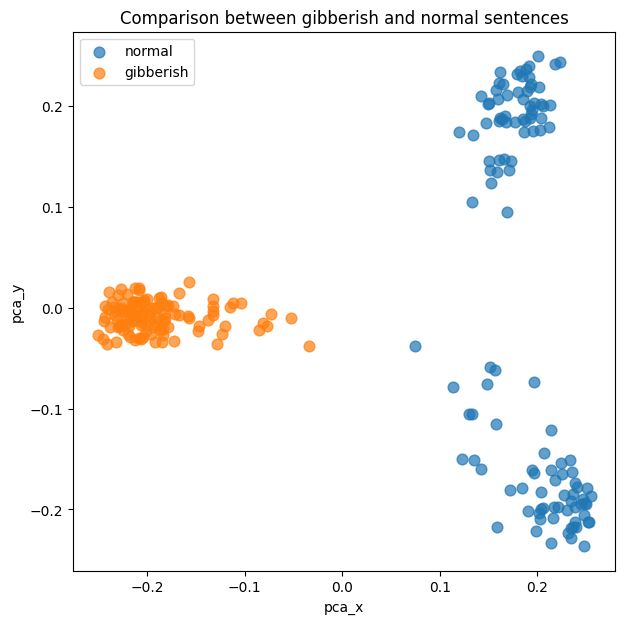

In [ ]:
# יצירת מודל PCA והתאמתו לנתונים
pca = PCA(n_components=2)
pca.fit(np.concatenate([embeddings_gibberish,embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy]))

# המרת הווקטורים ל-2 ממדים ע"י ה-PCA
reduced_vectors_facts = pca.transform(np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy]))
reduced_vectors_gibberish = pca.transform(embeddings_gibberish)



# יצירת גרף 2D
x_facts = [v[0] for v in reduced_vectors_facts]
y_facts = [v[1] for v in reduced_vectors_facts]

x_gibberish = [v[0] for v in reduced_vectors_gibberish]
y_gibberish = [v[1] for v in reduced_vectors_gibberish]



# ויזואליזציה
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.scatter(x_facts, y_facts, label="normal", alpha=0.7,s=60)
ax.scatter(x_gibberish, y_gibberish, label="gibberish", alpha=0.7,s=60)

ax.set_xlabel("pca_x")
ax.set_ylabel("pca_y")
ax.legend()
ax.set_title("Comparison between gibberish and normal sentences")
plt.show()

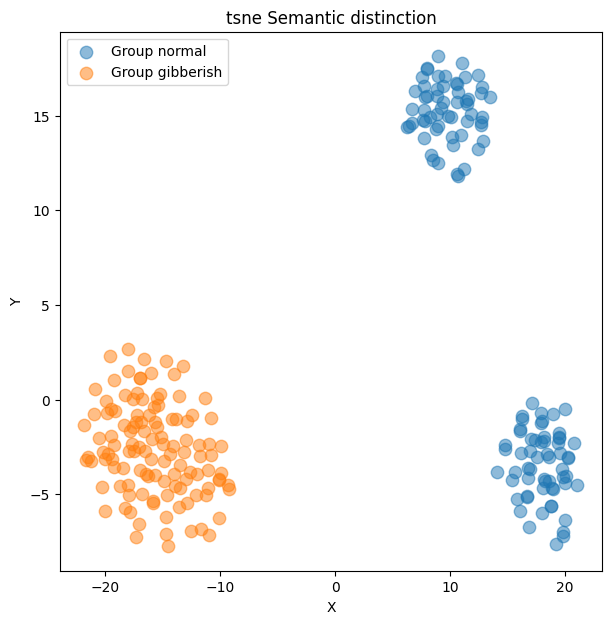

In [ ]:
embeddings = np.concatenate([embeddings_basketball, embeddings_good_basketball, embeddings_bed_basketball, democracy_embeddings, embeddings_good_democracy, embeddings_bed_democracy])

# נתונים רב-ממדיים מ-6 קבוצות בגדלים שונים
X = np.concatenate([embeddings,embeddings_gibberish])
y = np.concatenate((np.zeros(embeddings.shape[0]), np.ones(embeddings_gibberish.shape[0])))

# יוצרים מקרן T-SNE ומריצים על כל הנתונים
tsne = TSNE(n_components=2)
X_3d = tsne.fit_transform(X)

# מציגים בתרשים 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

#colors = ['r', 'g', 'b', 'y', 'm', 'c']
#sizes = [60, 50, 40, 30, 70, 20]  # גדלי הנקודות עבור כל קבוצה
labels = ["normal","gibberish"]
for i in range(2):
    ax.scatter(X_3d[y==i,0], X_3d[y==i,1], label=f'Group {labels[i]}', alpha=0.5,s=80)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("tsne Semantic distinction")
ax.legend()
plt.show()

In [ ]:
X_3d[y==i,0]

array([-12.463545 , -16.639307 , -11.297096 , -12.028986 , -17.17412  ,
       -16.786621 , -14.605766 , -21.645512 , -15.344612 , -20.473034 ,
       -18.356682 , -17.318403 , -18.68485  , -12.586836 , -13.595943 ,
       -14.196924 , -11.211273 , -11.061277 , -12.551714 , -21.208176 ,
       -16.425093 , -13.93643  , -11.840945 ,  -9.918621 , -14.977253 ,
       -17.550388 , -17.074526 , -19.379135 , -16.939308 , -21.493305 ,
       -10.913832 , -18.013752 , -13.458924 , -16.902153 , -17.83887  ,
       -16.282763 , -14.068225 , -12.885005 , -13.135616 ,  -9.918723 ,
       -15.152304 , -19.932394 , -18.259539 , -14.865478 , -16.588928 ,
       -15.709269 , -20.882633 , -13.953505 , -10.109851 , -17.229507 ,
       -13.4815855, -12.848874 , -17.522728 , -14.658794 , -15.782058 ,
       -14.7110405, -18.460682 ,  -9.202995 , -20.008955 , -15.171806 ,
       -18.02452  , -12.937332 , -19.48201  , -11.64531  , -21.790154 ,
       -13.827173 , -15.669307 , -14.847798 , -16.03458  , -19.1